# First Plots - Obsolete notebook, not used currently!
In this notebook the .csv files from the mocap system and the Solomon Coder video annotator software are imported and a few plots are created to check the data. 

In [1]:
#importing packages to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [15, 15]

In [2]:
mocapy_file = "../log/Husky_02-processed [MISLABELED EPISODES].csv"
video_file  = "../log/vid_tags_time_refined.csv"

data = pd.read_csv(mocapy_file ,header=22)              #loading the processed mocap data file
video_data = pd.read_csv(video_file, header=0, sep=";") #importing the video tags made with Solomon Coder

In [3]:
data.head(3)

Frame  Time  Episode counter          Episode name  DOG_pos_X  DOG_pos_Y  \
0      0  0.00              0.5  Episode #1 - DOG/OWN   0.841892   1.021655   
1      1  0.02              0.5  Episode #1 - DOG/OWN   0.838784   1.018172   
2      2  0.04              0.5  Episode #1 - DOG/OWN   0.836239   1.013780   

   DOG_pos_Z  DOG_rot_Z  DOG_tracked  DOG_has_toy  ...  DOOR_pos_Z  \
0   0.793155 -11.959270         True        False  ...    1.814723   
1   0.791944  -8.540252         True        False  ...    1.815386   
2   0.790797  -6.032370         True        False  ...    1.815386   

   DOOR_rot_Z  DOOR_tracked  DOOR_is_open  WAND_pos_X  WAND_pos_Y  WAND_pos_Z  \
0 -124.156755          True         False         0.0         0.0         0.0   
1 -122.653623          True         False         0.0         0.0         0.0   
2 -122.653623         False         False         0.0         0.0         0.0   

   WAND_rot_Z  WAND_tracked  Unnamed: 50  
0         0.0         False          NaN  
1         0.0         False          NaN  
2         0.0         False          NaN  

[3 rows x 51 columns]

In [4]:
data.tail(3)

Frame    Time  Episode counter          Episode name  DOG_pos_X  \
47763  47763  955.26              7.5  Episode #7 - DOG/OWN   1.153743   
47764  47764  955.28              7.5  Episode #7 - DOG/OWN   1.152140   
47765  47765  955.30              7.5  Episode #7 - DOG/OWN   1.150689   

       DOG_pos_Y  DOG_pos_Z   DOG_rot_Z  DOG_tracked  DOG_has_toy  ...  \
47763  -0.036096   0.441919  179.110781         True         True  ...   
47764  -0.038036   0.440563  178.970491         True         True  ...   
47765  -0.039546   0.439890  177.673319         True         True  ...   

       DOOR_pos_Z  DOOR_rot_Z  DOOR_tracked  DOOR_is_open  WAND_pos_X  \
47763    1.814023 -121.746739          True         False         0.0   
47764    1.814011 -121.708543          True         False         0.0   
47765    1.814029 -121.761519          True         False         0.0   

       WAND_pos_Y  WAND_pos_Z  WAND_rot_Z  WAND_tracked  Unnamed: 50  
47763         0.0         0.0         0.0         False          NaN  
47764         0.0         0.0         0.0         False          NaN  
47765         0.0         0.0         0.0         False          NaN  

[3 rows x 51 columns]

## Experiment participant paths

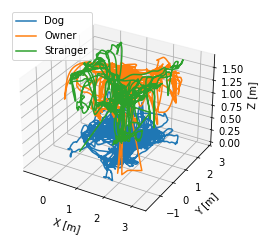

In [5]:
from mpl_toolkits import mplot3d
#plotting the experiment's participants' path (unneeded plot can be commented)
ax = plt.axes(projection="3d")
plt.plot(data["DOG_pos_X"],data["DOG_pos_Y"],data["DOG_pos_Z"],label="Dog")
plt.plot(data["OWN_pos_X"],data["OWN_pos_Y"],data["OWN_pos_Z"],label="Owner")
plt.plot(data["STR_pos_X"],data["STR_pos_Y"],data["STR_pos_Z"],label="Stranger")
#plt.plot(data["TOY_pos_X"],data["TOY_pos_Y"],data["TOY_pos_Z"],label="Toy")
ax.set_xlabel("X [m]")
ax.set_ylabel("Y [m]")
ax.set_zlabel("Z [m]")
plt.legend(loc=2)
plt.show()

In [53]:
#extract scene start and endpoints
num_video_tags = video_data.shape[0]
start_markers = [] #list for scene startpoints
end_markers = [] #list for scene endpoints
for i in range(num_video_tags):
    if video_data["Scene"][i] == "New Scene":
        start_markers.append(i)
    elif video_data["Scene"][i] == "Scene End":
        end_markers.append(i)
start_markers = np.array(start_markers)
end_markers = np.array(end_markers)
print(start_markers)
print(end_markers)
print(end_markers-start_markers+1)
mocap_ofs = 0
for i in range(len(data)):
    if data["Episode counter"][i] == 0.5 : 
        mocap_ofs += 1 
    else: 
        break
print(mocap_ofs)

[ 3142 10095 16842 24050 30761 37425 44413]
[ 9160 16117 22842 30036 36776 43439 50412]
[6019 6023 6001 5987 6016 6015 6000]
176


## Sync check
We check wheter the mocap and video data are in sync.

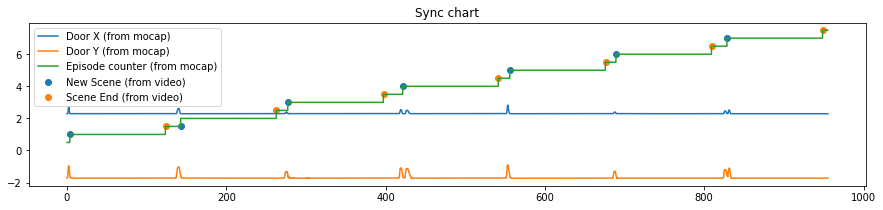

In [55]:
#plotting door x and y positions and scene markers to check whether they are in sync
#print(data["Episode name"].unique())
#print(data["Episode counter"].unique())
plt.figure(figsize=(15,3))
plt.plot(data["Time"], data["DOOR_pos_X"],label="Door X (from mocap)")
plt.plot(data["Time"], data["DOOR_pos_Y"],label="Door Y (from mocap)")
plt.plot(data["Time"], data["Episode counter"], label="Episode counter (from mocap)")
plt.scatter(data["Time"][(start_markers - start_markers[0]+mocap_ofs)],data["Episode counter"][(start_markers - start_markers[0]+mocap_ofs)],label="New Scene (from video)")
plt.scatter(data["Time"][(end_markers - start_markers[0]+mocap_ofs)],data["Episode counter"][(end_markers - start_markers[0]+mocap_ofs)],label="Scene End (from video)")
plt.title("Sync chart")
plt.legend()
plt.show()

In [57]:
print("Number of data points:")
print("Episode\tMocap\tVideo")
for i in range(1,8):
    ep = data.loc[data["Episode counter"]==i]
    print(str(i)+"\t"+str(len(ep))+"\t"+str(end_markers[i-1]-start_markers[i-1]+1))

Number of data points
Episode	Mocap	Video
1	6000	6019
2	6000	6023
3	6000	6001
4	6000	5987
5	6000	6016
6	6000	6015
7	6000	6000


# Data Preprocess

In [8]:
video_data["Tail"].unique()

array([nan, 'Tail wag'], dtype=object)

In [9]:
video_data['Tail'] = video_data['Tail'].replace([None], 0) 
video_data['Tail'] = video_data['Tail'].replace(['Tail wag'], 1) 

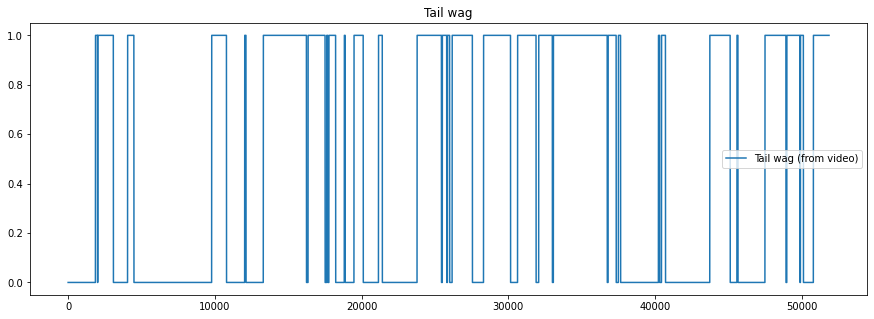

In [10]:
plt.figure(figsize=(15,5))
plt.plot(video_data["Tail"],label="Tail wag (from video)")
plt.title("Tail wag")
plt.legend()
plt.show()

In [11]:
video_data["Attention"].unique()

array(['look at owner', nan, 'look at door', 'look at stranger',
       'look at toy'], dtype=object)

In [12]:
video_data['Attention'] = video_data['Attention'].replace([None], 0) 
video_data['Attention'] = video_data['Attention'].replace(['look at owner'], 1) 
video_data['Attention'] = video_data['Attention'].replace(['look at stranger'], 2) 
video_data['Attention'] = video_data['Attention'].replace(['look at door'], 3)
video_data['Attention'] = video_data['Attention'].replace(['look at toy'], 4)

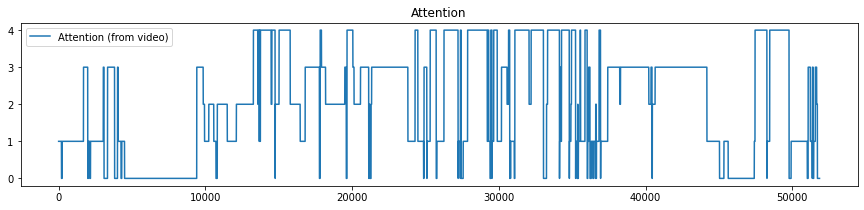

In [13]:
plt.figure(figsize=(15,3))
plt.plot(video_data['Attention'],label='Attention (from video)')
plt.title("Attention")
plt.legend()
plt.show()

In [14]:
video_data['Contact'].unique()

array(['Contact with OWN', nan, 'Contact with STR'], dtype=object)

In [15]:
video_data['Contact'] = video_data['Contact'].replace([None], 0) 
video_data['Contact'] = video_data['Contact'].replace(['Contact with OWN'], 1) 
video_data['Contact'] = video_data['Contact'].replace(['Contact with STR'], 2) 

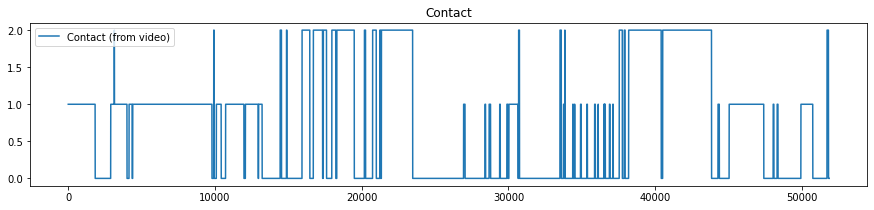

In [16]:
plt.figure(figsize=(15,3))
plt.plot(video_data['Contact'],label='Contact (from video)')
plt.title('Contact')
plt.legend()
plt.show()

In [17]:
video_data["Contact Seeking"].unique()

array([nan])